In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [ ]:
'''
Sen
'''

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
def sen(x,tol, maxiter):
  suma=0
  valores=[]   #Acá se van a guardar los valores de S_n
  ejex=[]  #Acá las iteraciones para hacer la gráfica después
  for i in range(0,maxiter):
    suma+=((-1)**i)*(x**(2*i+1))/(math.factorial(2*i+1))  #Sumatoria
    valores.append(suma)  #Añade la suma parcial
    ejex.append(i+1)
    if abs(suma+((-1)**i)*(x**(2*i+1))/(math.factorial(2*i+1))-suma)<tol:
      return suma, valores, ejex  #Cuando la diferencia de S_{n+1}-S_{n} es menor que la tolerancia devuelve S_{n}
      break
  raise RuntimeError(f"El proceso se detuvo después de las iteraciones máximas dadas, {maxiter}")  #Salta el error si se pasa de las iteraciones máximas
valorfinal,valores,iteraciones=sen(np.pi/4, 1e-10,100)
plt.plot(iteraciones, valores)
plt.xlabel("Iteraciones")
plt.ylabel("Valor de la suma parcial")
plt.grid()
plt.show()
errores_relativos=[float(abs(sen(np.pi/4, 1e-1,100)[0]-np.sin(np.pi/4))/np.sin(np.pi/4)),
                   float(abs(sen(np.pi/4, 1e-2,100)[0]-np.sin(np.pi/4))/np.sin(np.pi/4)),
                   float(abs(sen(np.pi/4, 1e-3,100)[0]-np.sin(np.pi/4))/np.sin(np.pi/4)),
                   float(abs(sen(np.pi/4, 1e-4,100)[0]-np.sin(np.pi/4))/np.sin(np.pi/4))]
errores_relativos
errores_porcentuales=[]
for i in errores_relativos:
  errores_porcentuales.append(f"{round(i*100, 6)} %")
datos={"Tolerancia":[1e-1,1e-2,1e-3,1e-4],"Aproximación de sen(pi/4)" :[sen(np.pi/4, 1e-1,100)[0],sen(np.pi/4, 1e-2,100)[0],sen(np.pi/4, 1e-3,100)[0],sen(np.pi/4, 1e-4,100)[0]],"Errores relativos":errores_relativos, "Errores porcentuales":errores_porcentuales}
errores=pd.DataFrame(datos) #Lo volví un DataFrame para practicar un poco de pandas también
errores=errores.set_index("Tolerancia", drop=True) #Que la tolerancia sea el índice
errores

In [ ]:
'''
Ln
'''

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
def ln(x,tol, maxiter):
  suma=0
  valores=[]   #Acá se van a guardar los valores de S_n
  ejex=[]  #Acá las iteraciones para hacer la gráfica después
  for i in range(1,maxiter):
    suma+=(((x-1)**i)*(-1)**(i-1))/i  #Sumatoria
    valores.append(suma)  #Añade la suma parcial a la lista de valores
    ejex.append(i)
    if abs((((x-1)**i)*(-1)**(i-1))/i)<tol: #La diferencia entre las sumas n y n+1 es precisamente ese término que se le está sumando
      return suma, valores, ejex
      break
  raise RuntimeError(f"El proceso se detuvo después de las iteraciones máximas dadas, {maxiter}")  #Salta el error si se pasa de las iteraciones máximas
valor,sp,iteraciones=ln(np.pi/4+1,1e-16,160)
plt.plot(iteraciones,sp, "b")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de la suma parcial")
plt.grid()
plt.show()
errores_relativos=[float(abs(ln(np.pi/4+1, 1e-2,150)[0]-math.log(np.pi/4+1))/math.log(np.pi/4+1)),
                   float(abs(ln(np.pi/4+1, 1e-4,150)[0]-math.log(np.pi/4+1))/math.log(np.pi/4+1)),
                   float(abs(ln(np.pi/4+1, 1e-6,150)[0]-math.log(np.pi/4+1))/math.log(np.pi/4+1)),
                   float(abs(ln(np.pi/4+1, 1e-8,150)[0]-math.log(np.pi/4+1))/math.log(np.pi/4+1))]
errores_porcentuales=[]
for i in errores_relativos:
  errores_porcentuales.append(f"{abs(round(i*100, 4))} %")
datos={"Tolerancia":[1e-2,1e-4,1e-6,1e-8],
       "Aproximación de ln(1+pi/4)" :[ln(np.pi/4+1, 1e-1,100)[0],ln(np.pi/4+1, 1e-2,100)[0],ln(np.pi/4+1, 1e-3,100)[0],ln(np.pi/4+1, 1e-4,100)[0]],
       "Errores relativos":errores_relativos, "Errores porcentuales":errores_porcentuales,
       "Iteraciones":[len(ln(np.pi/4+1, 1e-2,150)[2]),len(ln(np.pi/4+1, 1e-4,150)[2]),len(ln(np.pi/4+1, 1e-6,150)[2]),len(ln(np.pi/4+1, 1e-8,150)[2])]}
errores=pd.DataFrame(datos) #Volví a usar lo mismo que en el seno, pero if it ain´t broke, como dicen los gringos
errores=errores.set_index("Tolerancia", drop=True) #Que la tolerancia sea el índice
errores

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



,|Aproximación,|Error Relativo,|Error Porcentual (%)
Iteraciones,,,
10,1.224751,5.170759e-06,5.170759e-04
25,1.224745,3.790846e-11,3.790846e-09
50,1.224745,3.625973e-16,3.625973e-14
100,1.224745,3.625973e-16,3.625973e-14


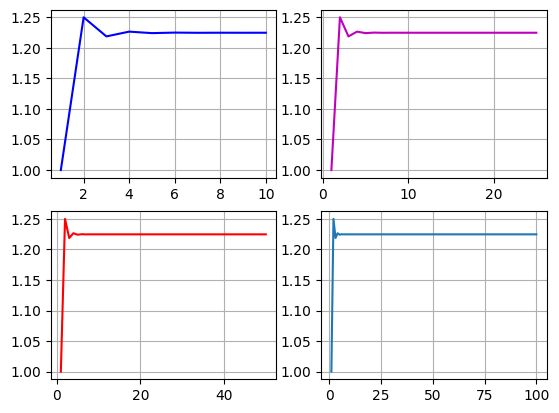

In [ ]:
'''
Puntos a,b,c
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def bin(a,n,x):
  iteraciones=[1,2]  #La forma en la que la planteé recibe valores de n mayores que 2, pues arranca en la segunda iteración
  sp=[1, 1+a*x]
  suma=1 + a*x
  a1=a
  for i in range(1,n-1):
    suma+= ((a1*(a-i))/(math.factorial(i+1)))*(x**(i+1)) #
    a1=a1*(a-i) #Reemplaza a1 por el producto del numerador de la última iteración
    iteraciones.append(i+2)  #Como empieza técnicamente en la segunda iteración n=i+2
    sp.append(suma)
  return suma,i+2,sp,iteraciones  #Voy a usar estas cosas para las gráficas y la tabla después

n_1=bin(0.5,10,0.5)
n_2=bin(0.5,25,0.5)
n_3=bin(0.5,50,0.5)
n_4=bin(0.5,100,0.5)
real=(1.5)**(1/2)
enes=[n_1,n_2,n_3,n_4]  #Estoy metiendo todo a listas para que sea más fácil de tratar
relerror=[]
porcerror=[]

for i in enes:
  relerror.append(abs((i[0]-real)/real))  #Acá lleno unas listas de los errores relativos y porcentuales para mostrarlas después en un dataframe
for i in relerror:
  porcerror.append(i*100)

fig,axs=plt.subplots(2,2)  #Para graficar las 4 que hice en una sola figura
axs[0,0].plot(n_1[3],n_1[2],"b-")
axs[0,0].grid()
axs[0,1].plot(n_2[3],n_2[2],"m-")
axs[0,1].grid()
axs[1,0].plot(n_3[3],n_3[2], "r-")
axs[1,0].grid()
axs[1,1].plot(n_4[3],n_4[2],)
axs[1,1].grid()
tabla=pd.DataFrame({"Iteraciones":[n_1[1], n_2[1], n_3[1], n_4[1]],
                    "|Aproximación":[n_1[0],n_2[0],n_3[0],n_4[0]],
                    "|Error Relativo":relerror,
                    "|Error Porcentual (%)":porcerror})
tabla=tabla.set_index("Iteraciones")
tabla

In [ ]:
'''
Punto d
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def bintol(a,tol,x,maxiter):
  iteraciones=[1,2]  #La forma en la que la planteé recibe valores de n mayores que 2, pues arranca en la segunda iteración
  sp=[1, 1+a*x]
  suma=1 + a*x
  a1=a
  for i in range(1,maxiter+1):
    suma+= ((a1*(a-i))/(math.factorial(i+1)))*(x**(i+1)) #
    a1=a1*(a-i) #Reemplaza a1 por el producto del numerador de la última iteración
    iteraciones.append(i+2)  #Como empieza técnicamente en la segunda iteración n=i+2
    sp.append(suma)
    if abs((a1*(a-i))/(math.factorial(i+1)))*(x**(i+1))<tol:
      return suma,i+2,tol
      break
  raise RuntimeError(f"Demasiadas iteraciones, {maxiter}")

print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print(v6)
print(v7)
iteraciones=[bintol(0.5,1e-2,0.5,1000)[1],bintol(0.5,1e-4,0.5,1000)[1],bintol(0.5,1e-6,0.5,1000)[1],bintol(0.5,1e-8,0.5,1000)[1],bintol(0.5,1e-10,0.5,1000)[1],bintol(0.5,1e-12,0.5,1000)[1],bintol(0.5,1e-14,0.5,1000)[1]]
tolerancia=[bintol(0.5,1e-2,0.5,1000)[2],bintol(0.5,1e-4,0.5,1000)[1],bintol(0.5,1e-6,0.5,1000)[1],bintol(0.5,1e-8,0.5,1000)[1],bintol(0.5,1e-10,0.5,1000)[1],bintol(0.5,1e-12,0.5,1000)[1],bintol(0.5,1e-14,0.5,1000)[1]]
plt.plot(tolerancia, iteraciones)
plt.title("Iteraciones necesarias para cumplir con la tolerancia")
plt.ylabel("Cantidad de iteraciones ")
plt.xlabel("Tolerancia")
plt.grid()
for i in range(0,len(iteraciones)):
  plt.scatter(tolerancia[i],iteraciones[i])


v1=f"{bintol(0.5,1e-2,0.5,1000)[0]}, {bintol(0.5,1e-2,0.5,1000)[1]} iteraciones"
v2=f"{bintol(0.5,1e-4,0.5,1000)[0]}, {bintol(0.5,1e-4,0.5,1000)[1]} iteraciones"  #Probando distintos valores de tolerancia
v3=f"{bintol(0.5,1e-6,0.5,1000)[0]}, {bintol(0.5,1e-6,0.5,1000)[1]} iteraciones"
v4=f"{bintol(0.5,1e-8,0.5,1000)[0]}, {bintol(0.5,1e-8,0.5,1000)[1]} iteraciones"
v5=f"{bintol(0.5,1e-10,0.5,1000)[0]}, {bintol(0.5,1e-10,0.5,1000)[1]} iteraciones"
v6=f"{bintol(0.5,1e-12,0.5,1000)[0]}, {bintol(0.5,1e-12,0.5,1000)[1]} iteraciones"
v7=f"{bintol(0.5,1e-14,0.5,1000)[0]}, {bintol(0.5,1e-14,0.5,1000)[1]} iteraciones"